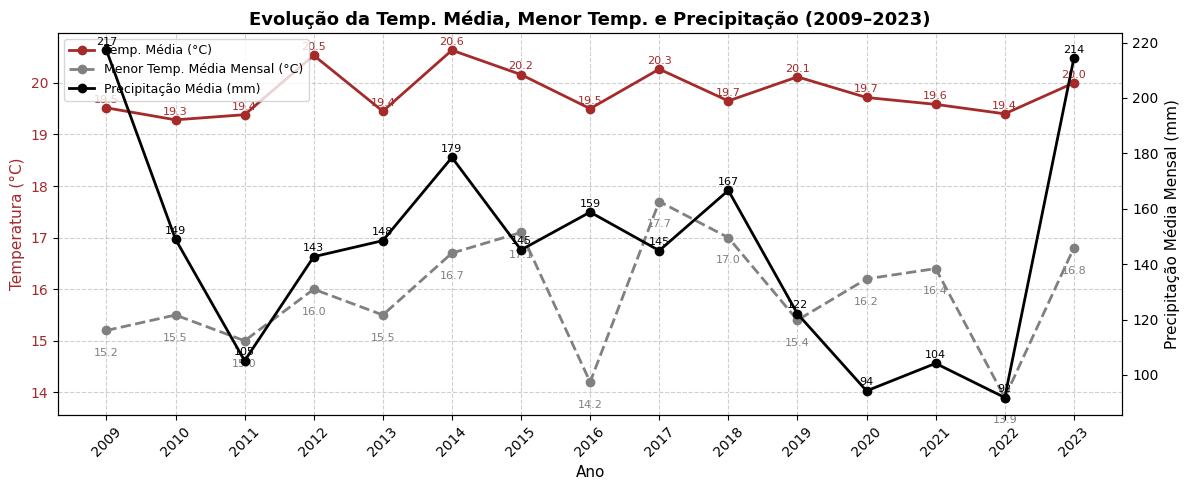

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv('Dados\Dados_IMBP\Tbl_TempChuvas.csv', sep=';', decimal=',')

# Ajustar tipos e nomes
df['Data Medicao'] = pd.to_datetime(df['Data Medicao'], dayfirst=True)
df['Precipitacao (mm)'] = df['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)']
df['Temperatura Media (°C)'] = df['TEMPERATURA MEDIA, MENSAL (AUT)(°C)']

# Criar coluna de ano
df['Ano'] = df['Data Medicao'].dt.year
df['Mes'] = df['Data Medicao'].dt.month

#df = df[df['Mes'].isin([9,10,11,12,1,2])]
df = df[df['Ano'].between(2009, 2023)]

# 3. Filtrar os dados para o período de 2009 a 2023
# 4. Agrupar por ano (média anual)
df_clima_anual = df.groupby("Ano").agg({
    "TEMPERATURA MEDIA, MENSAL (AUT)(°C)": "mean",
    "PRECIPITACAO TOTAL, MENSAL (AUT)(mm)": "mean"
}).rename(columns={
    "TEMPERATURA MEDIA, MENSAL (AUT)(°C)": "Temp Média (°C)",
    "PRECIPITACAO TOTAL, MENSAL (AUT)(mm)": "Precipitação Média (mm)"
})

# 5. Preparar os dados para o gráfico
anos_clima = df_clima_anual.index
temp_media = df_clima_anual["Temp Média (°C)"]
prec_media = df_clima_anual["Precipitação Média (mm)"]
min_temp_media_anual = df.groupby("Ano")["Temperatura Media (°C)"].min()

# Corrigir vírgulas se necessário e garantir tipo float
min_temp_media_anual = min_temp_media_anual.astype(float)

# Recriar gráfico com 3 linhas: temperatura média, mínima e precipitação
fig, ax1 = plt.subplots(figsize=(12, 5))

# Temperatura média
temp_plot = ax1.plot(anos_clima, temp_media, color='brown', marker='o', linewidth=2, label='Temp. Média (°C)')

# Temperatura mínima anual (menor média mensal do ano)
min_plot = ax1.plot(min_temp_media_anual.index, min_temp_media_anual.values, color='gray', marker='o', linestyle='--', linewidth=2, label='Menor Temp. Média Mensal (°C)')

# Rótulos temperatura média
for i, temp in enumerate(temp_media):
    ax1.text(anos_clima[i], temp + 0.1, f"{temp:.1f}", color='brown', ha='center', fontsize=8)

# Rótulos temperatura mínima
for i, temp in enumerate(min_temp_media_anual.values):
    ax1.text(min_temp_media_anual.index[i], temp - 0.5, f"{temp:.1f}", color='gray', ha='center', fontsize=8)

ax1.set_ylabel("Temperatura (°C)", color='brown', fontsize=11)
ax1.tick_params(axis='y', labelcolor='brown')
ax1.set_xticks(anos_clima)
ax1.set_xticklabels(anos_clima, rotation=45, fontsize=10)

# Precipitação
ax2 = ax1.twinx()
prec_plot = ax2.plot(anos_clima, prec_media, color='black', marker='o', linewidth=2, label='Precipitação Média (mm)')
ax2.set_ylabel("Precipitação Média Mensal (mm)", color='black', fontsize=11)
ax2.tick_params(axis='y', labelcolor='black')

# Rótulos precipitação
for i, prec in enumerate(prec_media):
    ax2.text(anos_clima[i], prec + 2, f"{prec:.0f}", color='black', ha='center', fontsize=8)

# Legenda combinada
lines = temp_plot + min_plot + prec_plot
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=9)

# Estilo geral
ax1.set_title("Evolução da Temp. Média, Menor Temp. e Precipitação (2009–2023)", fontsize=13, weight='bold')
ax1.set_xlabel("Ano", fontsize=11)
ax1.grid(True, which='major', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()